
Lane Line detection is a critical component for self driving cars and also for computer vision in general. This concept is used to describe the path for self-driving cars and to avoid the risk of getting in another lane.


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_lane_lines(image_path):
    image = cv2.imread(image_path)

    
   

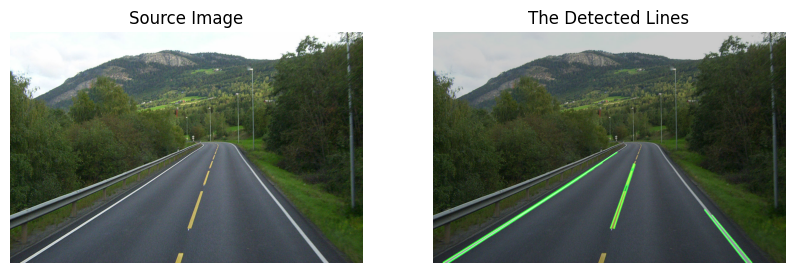

In [2]:

def detect_lane_lines(image_path):
    
    image = cv2.imread(image_path)

    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    
    edges = cv2.Canny(blurred, 50, 150)

    
    height, width = edges.shape
    mask = np.zeros_like(edges)
    roi_vertices = np.array([[(0, height), (width / 2, height / 2), (width, height)]], dtype=np.int32)
    cv2.fillPoly(mask, roi_vertices, 255)
    masked_edges = cv2.bitwise_and(edges, mask)

    
    lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

    
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=3)
    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Source Image')
    ax1.axis('off')
    ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax2.set_title('The Detected Lines')
    ax2.axis('off')
    plt.show()

image_path = 'road.jpg'  
detect_lane_lines(image_path)

